# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [119]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [120]:
# create query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# initializations
found_cities = []
country = []
lat = []
long = []
hum = []
temp = []
wind = []
cloud = []
n = 0

# loop through cities, perform query, build 8 lists, print log
for city in cities:
    try:     
        response = requests.get(query_url + city).json()
        cntry = response['sys']['country']
        country.append(cntry)
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        found_cities.append(city)   
        n = n + 1
        print("processed city #" + str(n) + ": " + city + " in country " + cntry)
    except:
        print("skipping city: " + city)



processed city #1: rikitea in country PF
processed city #2: khatanga in country RU
processed city #3: xuddur in country SO
processed city #4: morros in country BR
processed city #5: viedma in country AR
processed city #6: la ronge in country CA
skipping city: mahanje
processed city #7: puntarenas in country CR
processed city #8: nome in country US
processed city #9: gigmoto in country PH
processed city #10: kapaa in country US
processed city #11: vaini in country IN
processed city #12: mazagao in country BR
processed city #13: podporozhye in country RU
processed city #14: puerto ayora in country EC
processed city #15: punta arenas in country CL
processed city #16: butaritari in country KI
processed city #17: ushuaia in country AR
processed city #18: vila in country IT
processed city #19: cape town in country ZA
processed city #20: kaitangata in country NZ
processed city #21: hilo in country US
processed city #22: victoria in country BN
processed city #23: busselton in country AU
proces

processed city #182: breves in country BR
processed city #183: nouadhibou in country MR
processed city #184: ginda in country IN
processed city #185: vestmannaeyjar in country IS
processed city #186: batouri in country CM
processed city #187: ewa beach in country US
processed city #188: mahanoro in country MG
skipping city: grand river south east
processed city #189: okha in country RU
processed city #190: sharjah in country AE
processed city #191: homer in country US
processed city #192: kijang in country KR
skipping city: bolungarvik
processed city #193: sucre in country BO
skipping city: meyungs
processed city #194: kavaratti in country IN
processed city #195: camacha in country PT
processed city #196: kibre mengist in country ET
processed city #197: thinadhoo in country MV
processed city #198: brownsville in country US
processed city #199: diego de almagro in country CL
processed city #200: meiktila in country MM
processed city #201: berlevag in country NO
processed city #202: uper

processed city #355: boa vista in country BR
processed city #356: general pico in country AR
processed city #357: luanda in country AO
processed city #358: samur in country AZ
processed city #359: morro bay in country US
processed city #360: manado in country ID
skipping city: talah
processed city #361: gawler in country AU
processed city #362: gannan in country CN
processed city #363: copainala in country MX
processed city #364: coro in country VE
skipping city: umzimvubu
processed city #365: de aar in country ZA
skipping city: phan rang
processed city #366: gazojak in country TM
processed city #367: tanout in country NE
processed city #368: petropavlovsk-kamchatskiy in country RU
processed city #369: tessalit in country ML
processed city #370: jining in country CN
processed city #371: leninskiy in country RU
processed city #372: vaitape in country PF
processed city #373: olga in country US
processed city #374: konevo in country BG
processed city #375: lokot in country RU
processed ci

processed city #533: dalbandin in country PK
processed city #534: bilma in country NE
processed city #535: inuvik in country CA
processed city #536: komsomolskiy in country RU
processed city #537: bozhou in country CN
processed city #538: gerash in country IR
processed city #539: provideniya in country RU
processed city #540: reconquista in country AR
processed city #541: deer lake in country CA
processed city #542: port macquarie in country AU
processed city #543: sundsvall in country SE
processed city #544: dourados in country BR
processed city #545: tambun in country ID
processed city #546: shenjiamen in country CN
processed city #547: venadillo in country CO
processed city #548: desbiens in country CA
processed city #549: dunedin in country NZ
processed city #550: bairnsdale in country AU
processed city #551: rosario in country UY
processed city #552: santa cruz in country BR
processed city #553: lodwar in country KE
processed city #554: troitsko-pechorsk in country RU
processed ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
# create data frame
weather_dict = {
    "City": found_cities,
    "Country": country,
    "Lat": lat,
    "Lng": long,
    "Humidity": hum,
    "Max Temp": temp,
    "Wind Speed": wind,
    "Cloudiness": cloud
}
weather_data = pd.DataFrame(weather_dict)

# export data frame to csv file
weather_data.to_csv("output.csv", index=False, header=True)

# print first 5 rows
weather_data.head(10)


,City,Country,Lat,Lng,Humidity,Max Temp,Wind Speed,Cloudiness
0,rikitea,PF,-23.12,-134.97,61,21.04,5.65,59
1,khatanga,RU,71.98,102.47,47,13.72,4.50,0
2,xuddur,SO,4.12,43.89,77,23.74,9.90,89
3,morros,BR,-2.87,-44.04,88,26.00,1.50,0
4,viedma,AR,-40.81,-62.99,60,4.05,4.54,0
5,la ronge,CA,55.10,-105.30,37,22.00,6.70,75
6,puntarenas,CR,9.98,-84.84,94,22.22,1.00,75
7,nome,US,30.04,-94.42,94,28.33,2.96,1
8,gigmoto,PH,13.78,124.39,76,28.91,9.68,100
9,kapaa,US,22.08,-159.32,83,27.00,5.70,90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

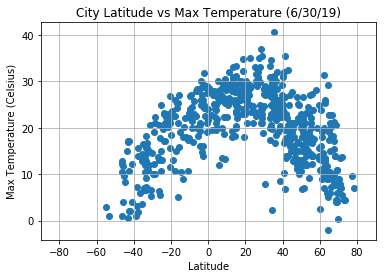

In [122]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude vs Max Temperature (6/30/19)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("max_temp_vs_latitude.png")
plt.show()


#### Latitude vs. Humidity Plot

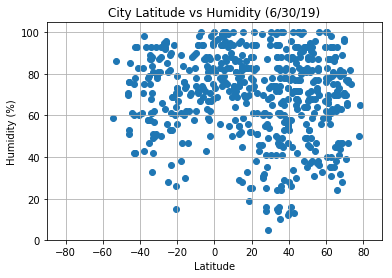

In [123]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude vs Humidity (6/30/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("humidity_vs_latitude.png")
plt.show()


#### Latitude vs. Cloudiness Plot

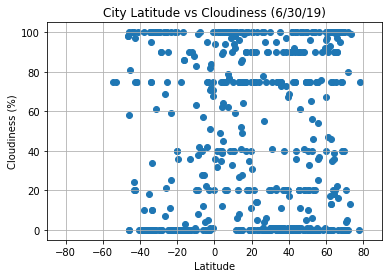

In [124]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness (6/30/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("cloudiness_vs_latitude.png")
plt.show()


#### Latitude vs. Wind Speed Plot

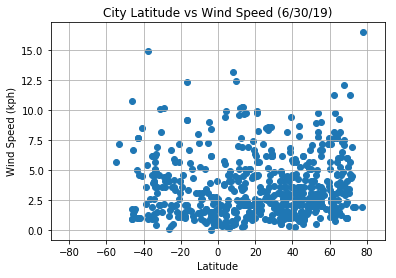

In [125]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude vs Wind Speed (6/30/19)")
plt.ylabel("Wind Speed (kph)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("wind_speed_vs_latitude.png")
plt.show()


### Some observations


The first observation is that most of the selected cities had latitudes between -20 and 70.  This reflects the geography of the world.

As expected, cities closer to the equator tended to have higher maximum temperatures.  There did not appear to be significant patterns versus latitude for the other three variables:   humidity, cloudiness, and wind speed.

Most temperatures ranged from 5 to 35 degrees Celsius.  Humidity was typically between 40% and 100%.  Cloudiness ranged from 0% to 100%, with many cities at the two extremes.  Finally, most wind speeds were under 10 kilometers per hour. 


